<h1>Ejercicios para perceptrón multicapa</h1>

## Parámetros del Perceptrón Multicapa

- **hidden_layer_sizes**: Recibe una tupla o arreglo $(n,m)$ de longitud $2$.
  - $n$ es el número de neuronas por capa y $m$ el número de capas. Por default se tiene $(100,)$ $100 neuronas una capa.

- **activation**: {'identity', 'logistic', 'tanh', 'relu'}
  - Función de activación para las capas ocultas. Las opciones son:
    - 'identity': $f(x) = x$
    - 'logistic': $f(x) = \frac{1}{1+e^{-x}}$
    - 'tanh': $f(x) = \text{tanh}(x)$
    - 'relu': $f(x) = \text{max}(0, x)$
  - Por default se usa 'relu'    
    

- **solver**: {'lbfgs', 'sgd', 'adam'}
  - Algoritmo para optimizar los pesos. Opciones:
    - 'lbfgs': optimizador de cuasi-Newton.
    - 'sgd': descenso de gradiente estocástico.
    - 'adam': optimizador adaptativo.
  - Por default se usa 'adam' 

- **alpha**: Recibe un número mayor a 0
  - Tasa de regularización L2. Ayuda a prevenir el sobreajuste. Por default se usa 0.0001.

- **batch_size**: Recibe un entero o 'auto'
  - Tamaño de mini-batch para el descenso de gradiente. Por default se usa 'auto' y asigna el minimo entre el número de datos y 200.

- **learning_rate**: {'constant', 'invscaling', 'adaptive'}
  - Estrategia para ajustar la tasa de aprendizaje. Opciones:
    - 'constant': tasa de aprendizaje fija.
    - 'invscaling': reduce la tasa de aprendizaje a medida que el tiempo avanza.
    - 'adaptive': mantiene la tasa de aprendizaje constante mientras la pérdida se reduzca.
  - Por defecto usa 'constant' y solo se usa con solver='sdg'

- **learning_rate_init**: Recibe un número mayor a 0.
  - Tasa de aprendizaje inicial con valor default igual a 0.001 y solo se requiere cuando solver='adam' o solver='sgd'

- **max_iter**: Recibe un número mayor a 0.
  - Número de iteraciones para solvers 'adam' o 'sdg'. Por defecto es 0.5.

- **random_state** Recibe un entero.

- **validation_fraction**
  - Si se establece como True, detiene el número de iteraciones cuando el score de los datos de entrenamiento no mejora.  Por defecto es False
- **verbose**
  - Requiere un entero $n$ e imprime de las iteraciones del $1$ al $n$ su error.
 

## Perceptrón multicapa clasificador:

<h3>Se agregan las librerías </h3>

In [207]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

<h3>Los datos a usar son metricas sobre vinos y se trata de predecir si es vino tinto o blanco. </h3>

In [341]:
df = pd.read_csv('https://github.com/CursosPosgradoCCM/ML-GDL/raw/refs/heads/main/code/data/winequality.csv').dropna()
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<h3>Separamos los datos en test y train </h3>

In [342]:
x = df.drop('type', axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y,random_state=42)

<h3>Escalamos </h3>

In [343]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [344]:
X_train_scaled.shape

(5170, 12)

<h3>Se entrena el modelo </h3>

In [345]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam', verbose=10)

mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 0.26621517
Iteration 2, loss = 0.20103179
Iteration 3, loss = 0.17405669
Iteration 4, loss = 0.16671987
Iteration 5, loss = 0.15958196
Iteration 6, loss = 0.15590797
Iteration 7, loss = 0.14982715
Iteration 8, loss = 0.12525900
Iteration 9, loss = 0.13360814
Iteration 10, loss = 0.13041190
Iteration 11, loss = 0.11705437
Iteration 12, loss = 0.11751214
Iteration 13, loss = 0.11540240
Iteration 14, loss = 0.10507285
Iteration 15, loss = 0.10055875
Iteration 16, loss = 0.09835869
Iteration 17, loss = 0.09867074
Iteration 18, loss = 0.09017641
Iteration 19, loss = 0.10496356
Iteration 20, loss = 0.08955373
Iteration 21, loss = 0.09550525
Iteration 22, loss = 0.11108287
Iteration 23, loss = 0.08356763
Iteration 24, loss = 0.08443218
Iteration 25, loss = 0.07722995
Iteration 26, loss = 0.07520889
Iteration 27, loss = 0.07895503
Iteration 28, loss = 0.08027707
Iteration 29, loss = 0.07594724
Iteration 30, loss = 0.08727055
Iteration 31, loss = 0.08671491
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(150, 100), max_iter=300, verbose=10)

<h3>Podemos ver las matrices de pesos del perceptrón:</h3>

### mlp_clf.coefs_ regresa una arreglo de longitud 3
 - mlp_clf.coefs_[0] contiene los pesos de la capa de entrada a la primera capa oculta
 - mlp_clf.coefs_[1] contiene los pesos de las capas ocultas
 - mlp_clf.coefs_[2] contiene los pesos de la última capa oculta a la capa de salida

In [346]:
mlp_clf.coefs_[0].shape

(12, 150)

<h3>Evaluamos el modelo </h3>

In [212]:
predictions = mlp_clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 0.99


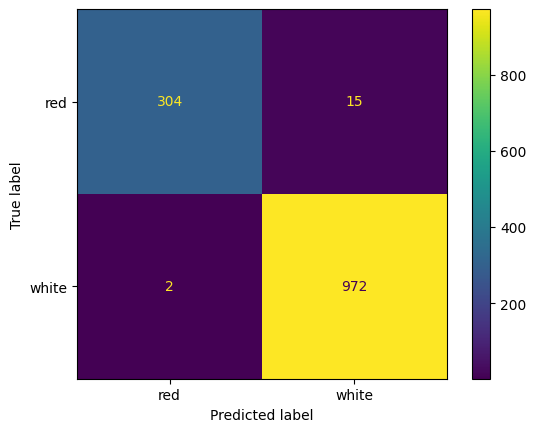

In [213]:
cm = confusion_matrix(y_test, predictions, labels=mlp_clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [214]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         red       0.99      0.95      0.97       319
       white       0.98      1.00      0.99       974

    accuracy                           0.99      1293
   macro avg       0.99      0.98      0.98      1293
weighted avg       0.99      0.99      0.99      1293



<h3>Observamos Loss Curve para ver como se ajusta el modelo de acuerdo a las iteraciones </h3>

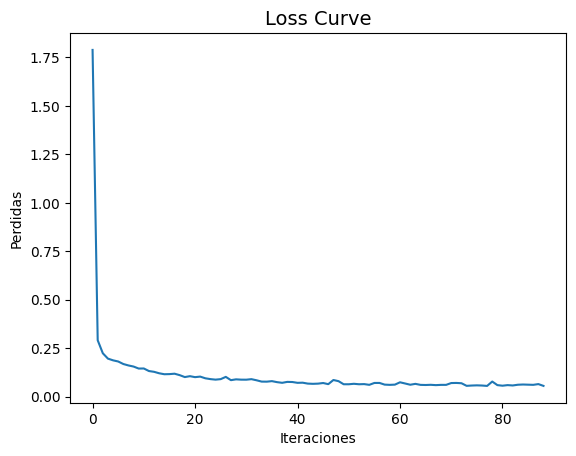

In [215]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Perdidas')
plt.show()

<h3>Para ajustar los hiperparámetros podemos usar grid search </h3>

In [227]:
param_grid = {
    #'hidden_layer_sizes': [(150,100), (120,80), (100,50)],
    'hidden_layer_sizes': [(150,100)],
    #'max_iter': [50, 100, 150],
   'max_iter': [300], 
    'activation': ['tanh', 'relu','identity','logistic'],
    #'solver': ['sgd', 'adam'],
}

In [228]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= 6, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': (150, 100), 'max_iter': 300}


<h3>Predecimos y observamos el ranking de modelos</h3>

In [229]:
grid_predictions = grid.predict(X_test_scaled) 

print('Accuracy:', accuracy_score(y_test, grid_predictions))

Accuracy: 0.9992266047950503


In [230]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.832989,0.288032,0.004989,0.000376,tanh,"(150, 100)",300,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.997099,0.994197,0.998066,0.995164,0.991296,0.995164,0.002369,1
3,8.768886,1.051505,0.006241,0.001955,logistic,"(150, 100)",300,"{'activation': 'logistic', 'hidden_layer_sizes...",0.994197,0.993230,0.998066,0.996132,0.991296,0.994584,0.002337,2
1,3.213596,0.148770,0.006288,0.001834,relu,"(150, 100)",300,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.996132,0.993230,0.996132,0.996132,0.990329,0.994391,0.002321,3
2,1.029095,0.204574,0.004232,0.000395,identity,"(150, 100)",300,"{'activation': 'identity', 'hidden_layer_sizes...",0.994197,0.992263,0.994197,0.995164,0.991296,0.993424,0.001421,4


<h1>Ejemplo de clasificación múltiple </h1>

<h3> Se presentan medidas del sépalo y pétalo de tres especies de flor</h3>

In [231]:
df = pd.read_csv('https://github.com/CursosPosgradoCCM/ML-GDL/raw/refs/heads/main/code/data/Iris_Data.csv').dropna()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<h3>Se separan los datos y se estandarizan</h3>

In [232]:
x = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)

In [233]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>Clasificador:</h3>

In [234]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100),
                        max_iter = 400,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100), max_iter=400)

<h3>Evaluación de las predicciones</h3>

In [235]:
predictions = mlp_clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 1.00


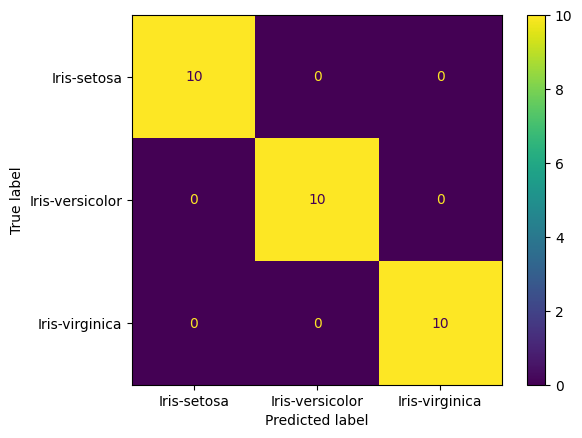

In [236]:
cm = confusion_matrix(y_test, predictions, labels=mlp_clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [237]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



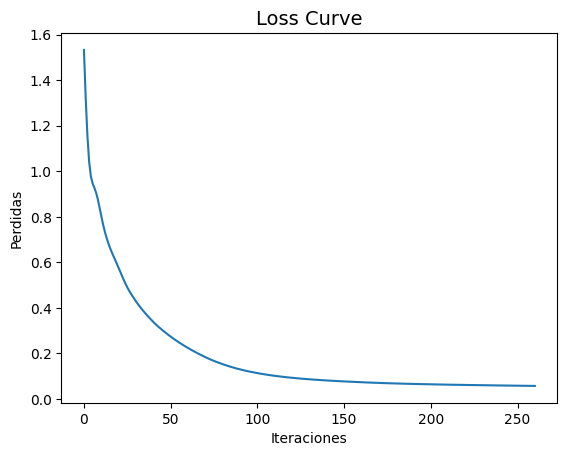

In [238]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Perdidas')
plt.show()

<h3> Optimización de hiperparámetros</h3>

In [239]:
param_grid = {
    #'hidden_layer_sizes': [(150,100), (120,80), (100,50)],
    'hidden_layer_sizes': [(150,100)],
    #'max_iter': [400, 450, 500],
    'max_iter': [400],
    'activation': ['tanh', 'relu','identity','logistic'],
    #'solver': ['sgd', 'adam'],
}

In [240]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= 2, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'tanh', 'hidden_layer_sizes': (150, 100), 'max_iter': 400}


In [241]:
grid_predictions = grid.predict(X_test_scaled) 

print('Accuracy:', accuracy_score(y_test, grid_predictions))

Accuracy: 0.9666666666666667


In [242]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.341298,0.072086,0.001362,0.000090,tanh,"(150, 100)",400,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.916667,0.958333,0.958333,1.000000,1.0,0.966667,0.031180,1
2,0.205658,0.032115,0.001281,0.000032,identity,"(150, 100)",400,"{'activation': 'identity', 'hidden_layer_sizes...",0.916667,0.958333,0.958333,1.000000,1.0,0.966667,0.031180,1
3,0.701887,0.135429,0.002014,0.001371,logistic,"(150, 100)",400,"{'activation': 'logistic', 'hidden_layer_sizes...",0.916667,0.958333,0.958333,1.000000,1.0,0.966667,0.031180,1
1,0.530622,0.074876,0.001521,0.000360,relu,"(150, 100)",400,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.916667,1.000000,0.916667,0.958333,1.0,0.958333,0.037268,4


## Perceptrón multicapa regresor:

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

<h3>Los datos a usar son precios de casas. Se buscará predecir el precio en base a sus carácteristicas.</h3>

In [279]:
df = pd.read_csv('https://github.com/CursosPosgradoCCM/ML-GDL/raw/refs/heads/main/code/data/house_prices.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<h3>Se desechan algunas características</h3>

In [280]:
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)


In [281]:
x = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

In [282]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2090,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1000,6947
21575,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2927,5183
5390,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,1690,2650
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1170,15000


<h3>Se escalan los datos</h3>

In [283]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = X_train
X_test_scaled = X_test

<h3>Ajuste de modelo</h3>

In [284]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,100),
                       max_iter = 200,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(X_train_scaled, y_train)

/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 100))

<h3>Se realiza la predicción</h3>

In [285]:
prediction = mlp_reg.predict(X_test_scaled)

<h3>Evaluación de predicciones</h3>

In [286]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df_temp.sort_index()

,Actual,Predicted
3,604000.0,514010.015386
6,257500.0,471843.675467
17,485000.0,415437.651593
31,280000.0,333264.311283
34,322500.0,538099.823503
...,...,...
21580,594866.0,732061.700161
21581,625000.0,732061.700161
21585,270000.0,502725.829226
21608,360000.0,460629.389675


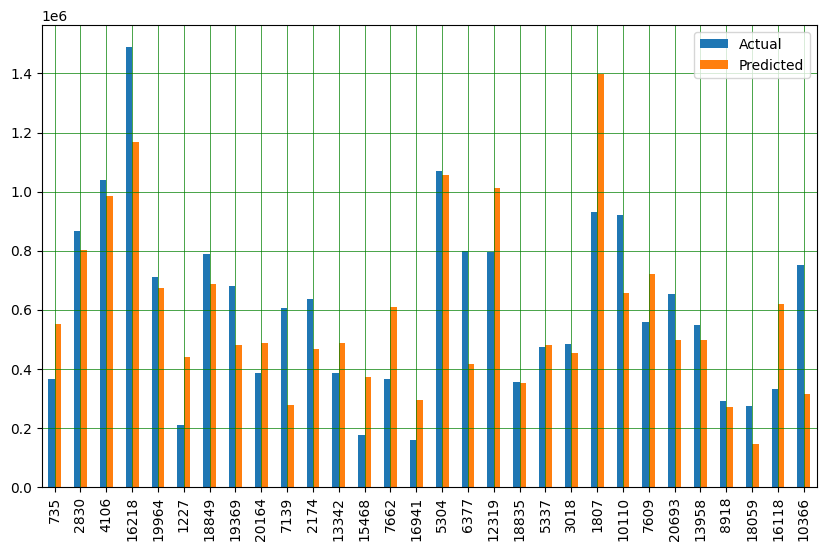

In [287]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [288]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Rsquared:', mlp_reg.score(X_test,y_test))

Mean Absolute Error: 169276.64719060282
Mean Squared Error: 74179578347.94861
Root Mean Squared Error: 272359.28173636494
Rsquared: 0.5093187486316417


<h3>Observamos la Loss Curve</h3>

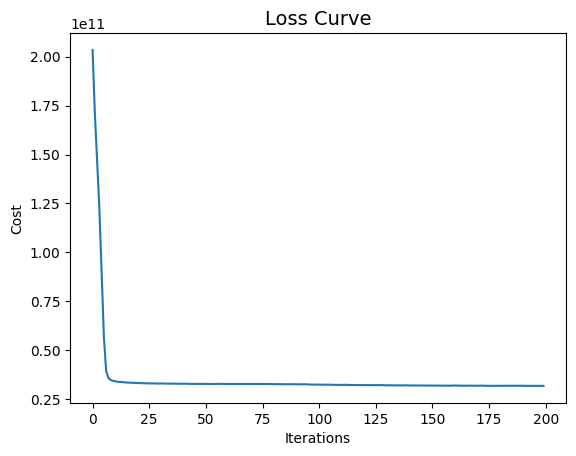

In [289]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h3>Optimización de parámetros</h3>

In [290]:
param_grid = {
    'hidden_layer_sizes': [(10,100)],
    'max_iter': [400],
    'activation': ['tanh', 'relu','identity','logistic']
}

In [291]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= 6)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'activation': 'logistic', 'hidden_layer_sizes': (10, 100), 'max_iter': 400}


In [292]:
grid_predictions = grid.predict(X_test_scaled)

<h3>Visualización para resultados de parámetros</h3>

In [293]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
735,365000.0,350000.0
2830,865000.0,550000.0
4106,1038000.0,550000.0
16218,1490000.0,415000.0
19964,711000.0,550000.0


In [294]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,407.324604,106.224054,0.134829,0.027495,logistic,"(10, 100)",400,"{'activation': 'logistic', 'hidden_layer_sizes...",0.004627,0.008676,0.009543,0.007230,0.007808,0.007577,0.001670,1
0,269.742391,89.524961,0.163607,0.016741,tanh,"(10, 100)",400,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.006651,0.008965,0.006940,0.007519,0.007230,0.007461,0.000806,2
1,492.429416,406.034285,0.167518,0.047521,relu,"(10, 100)",400,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.006362,0.005495,0.006362,0.006940,0.006651,0.006362,0.000484,3
2,220.223422,18.176026,0.161231,0.011434,identity,"(10, 100)",400,"{'activation': 'identity', 'hidden_layer_sizes...",0.004916,0.006362,0.004338,0.005784,0.005495,0.005379,0.000699,4


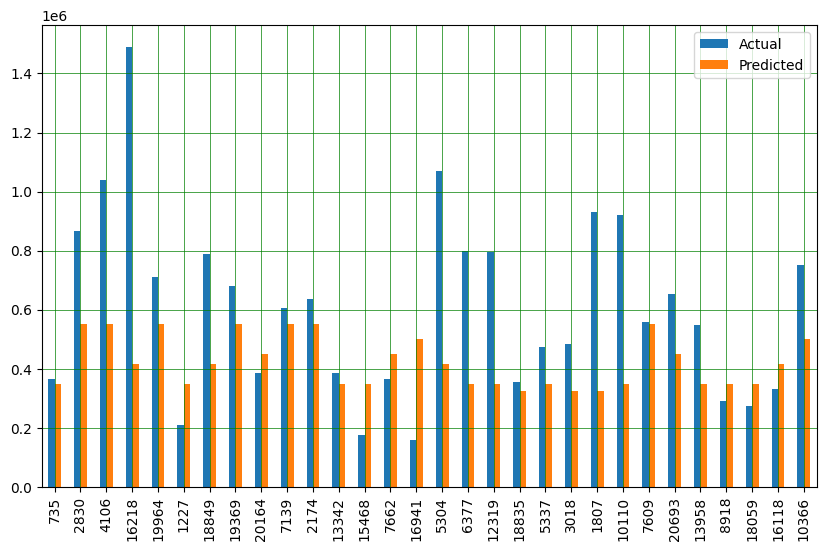

In [295]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [297]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))
print('Rsquared:', grid.score(X_test,y_test))

Mean Absolute Error: 224679.40550543604
Mean Squared Error: 166652644665.70575
Root Mean Squared Error: 408231.1167288767
Rsquared: 0.007633587786259542


<h3>Comparando con un modelo lineal:</h3>

In [302]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_scaled,y_train)
prediction_linear = reg.predict(X_test)


0.6176951001478259

In [303]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_linear))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_linear)))
print('Rsquared:', reg.score(X_test,y_test))

Mean Absolute Error: 153669.37003972378
Mean Squared Error: 57795597839.33849
Root Mean Squared Error: 240407.15014187596
Rsquared: 0.6176951001478259


<h3>Ejercicio: Aplicar el perceptrón múltiple para los datos de CAMDA, qué función de activación es la mejor?</h3>

In [298]:
import pandas as pd
taxonomy=pd.read_csv('https://github.com/ccm-bioinfo/Camda25_gut/raw/main/DataSets/CAMDA/taxonomy.csv',index_col=0)
metadata=pd.read_csv('https://github.com/ccm-bioinfo/Camda25_gut/raw/refs/heads/main/DataSets/CAMDA/metadata.csv',index_col=2)
pathway=pd.read_csv('https://github.com/ccm-bioinfo/Camda25_gut/raw/refs/heads/main/DataSets/CAMDA/pathways.csv',on_bad_lines='skip',sep='\t',index_col=0)

<h2>Visualizar pesos</h2>

In [381]:
import warnings
from sklearn.exceptions import ConvergenceWarning #Se importan paqueterias para evitar los mensajes de advertencia

<h3>Cargamos los datos. Estos datos tienen por X vectores de dimensión 784 y sus coordenadas tienen un número entre 0 y 255. Si cada vector lo transformamos en una matriz de 28x28, y graficamos toamando como 255 más negro y 0 más blanco, veremos que son imagenes de números pixeleados.</h3>

In [382]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0 #al dividir entre 255 estandarizamos

<h3>Se parten los datos y se crea el modelo</h3>

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,200),
    max_iter=12000,
    alpha=1e-4,
    solver="sgd",
    #verbose=10,
    activation='relu',
    random_state=1,
    learning_rate_init=0.2,
)

<h3>Entrenamos el modelo</h3>

In [384]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Score entrenamiento %f" % mlp.score(X_train, y_train))
print("Score de test %f" % mlp.score(X_test, y_test))

Score entrenamiento 0.992810
Score de test 0.954408


<h3>Ahora gráficamos los pesos del input a la primera capa</h3>

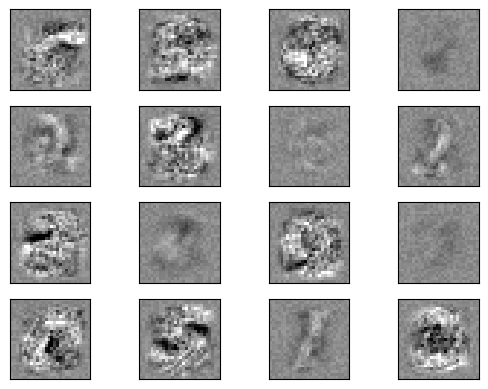

In [385]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [388]:
y_train

array(['8', '0', '6', ..., '7', '1', '1'], dtype=object)